<a href="https://colab.research.google.com/github/Subhom-Ghosh/GaussianMixtureModel-GMM-/blob/main/GausssianMixtureModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.mixture import GaussianMixture

In [ ]:
wine = datasets.load_wine()
X = wine.data[:,:2]

In [ ]:
n_components=2
covariance_types = ['full','tied','diag','spherical']

In [ ]:
gmm_models={cov_type:GaussianMixture(n_components=n_components,covariance_type=cov_type)
for cov_type in covariance_types}
for cov_type,gmm_model in gmm_models.items():
  gmm_model.fit(X)

In [ ]:
covariances={cov_type:gmm_model.covariances_
             for cov_type,gmm_model in gmm_models.items()}

In [ ]:
predictions={cov_type:gmm_model.predict(X)
              for cov_type,gmm_model in gmm_models.items()}

Covariance Matrix (full - Component):
[[0.65850482 0.14306183]
 [0.14306183 0.08963565]]
Covariance Matrix (tied - Component):
[0.65472811 0.06104194]
Covariance Matrix (diag - Component):
[0.45849968 0.86233858]
Covariance Matrix (spherical - Component):
0.5272300465214598


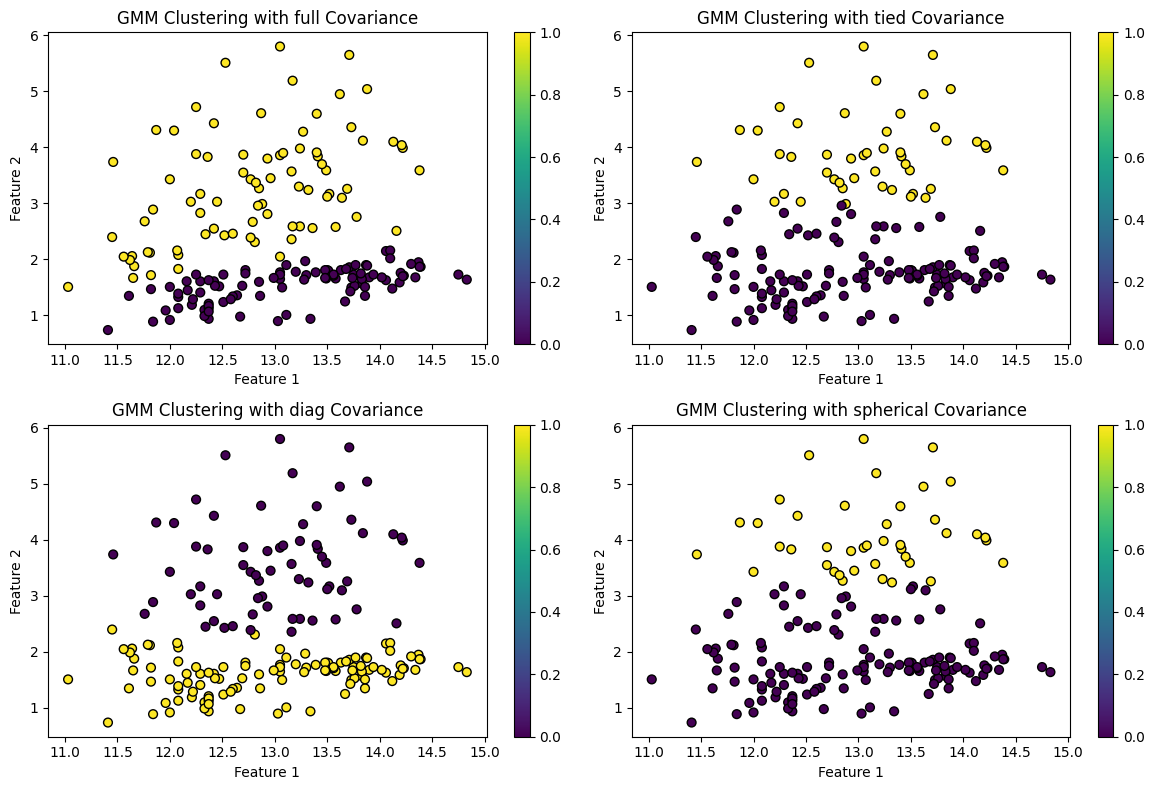

In [ ]:
plt.figure(figsize=(12,8))
for i,(cov_type,gmm_model) in enumerate(gmm_models.items(),1):
  plt.subplot(2,2,i)
  plt.scatter(X[:,0],X[:,1],c=predictions[cov_type],cmap='viridis',edgecolors='k',s=40)
  plt.title(f'GMM Clustering with {cov_type} Covariance')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.colorbar()

  print(f'Covariance Matrix ({cov_type} - Component):\n{covariances[cov_type][0]}')

plt.tight_layout()
plt.show()